In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../DATA/Advertising.csv')

## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Делаем разбиение на TRAIN и TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабируем данные (SCALE)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elastic_net_model = ElasticNet()

parameter_grid = {'alpha':[0.1, 1, 5, 50, 100],
                  'l1_ratio':[.1, .5, .7, .95, .99, 1]}

grid_model = GridSearchCV(estimator=base_elastic_net_model, 
                          param_grid=parameter_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=5, 
                          verbose=2)

In [4]:
# Сделает 3 вещи:
# Пройдет в цикле по всем параметрам 
# Для каждой комбинации гиперпараметров - выполнит кросс-вал на к-частей 
# Выберет наилучшую комбинацию гиперпараметров по указанной метке и вернет уже обученную модель

grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [5]:
print(grid_model.best_estimator_)
print(grid_model.best_params_)

ElasticNet(alpha=0.1, l1_ratio=1)
{'alpha': 0.1, 'l1_ratio': 1}


In [6]:
pd.DataFrame(grid_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001017,0.001158,0.000302,0.000047,0.1,0.10,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.000415,0.000005,0.000273,0.000002,0.1,0.50,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.000544,0.000139,0.000299,0.000027,0.1,0.70,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.000659,0.000193,0.000419,0.000184,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.000472,0.000083,0.000295,0.000041,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2


In [7]:
from sklearn.metrics import mean_squared_error

y_pred = grid_model.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}\n')
print(f'Best param: {grid_model.best_params_}')

MSE: 2.387342642087474
RMSE: 1.5451027933724908

Best param: {'alpha': 0.1, 'l1_ratio': 1}


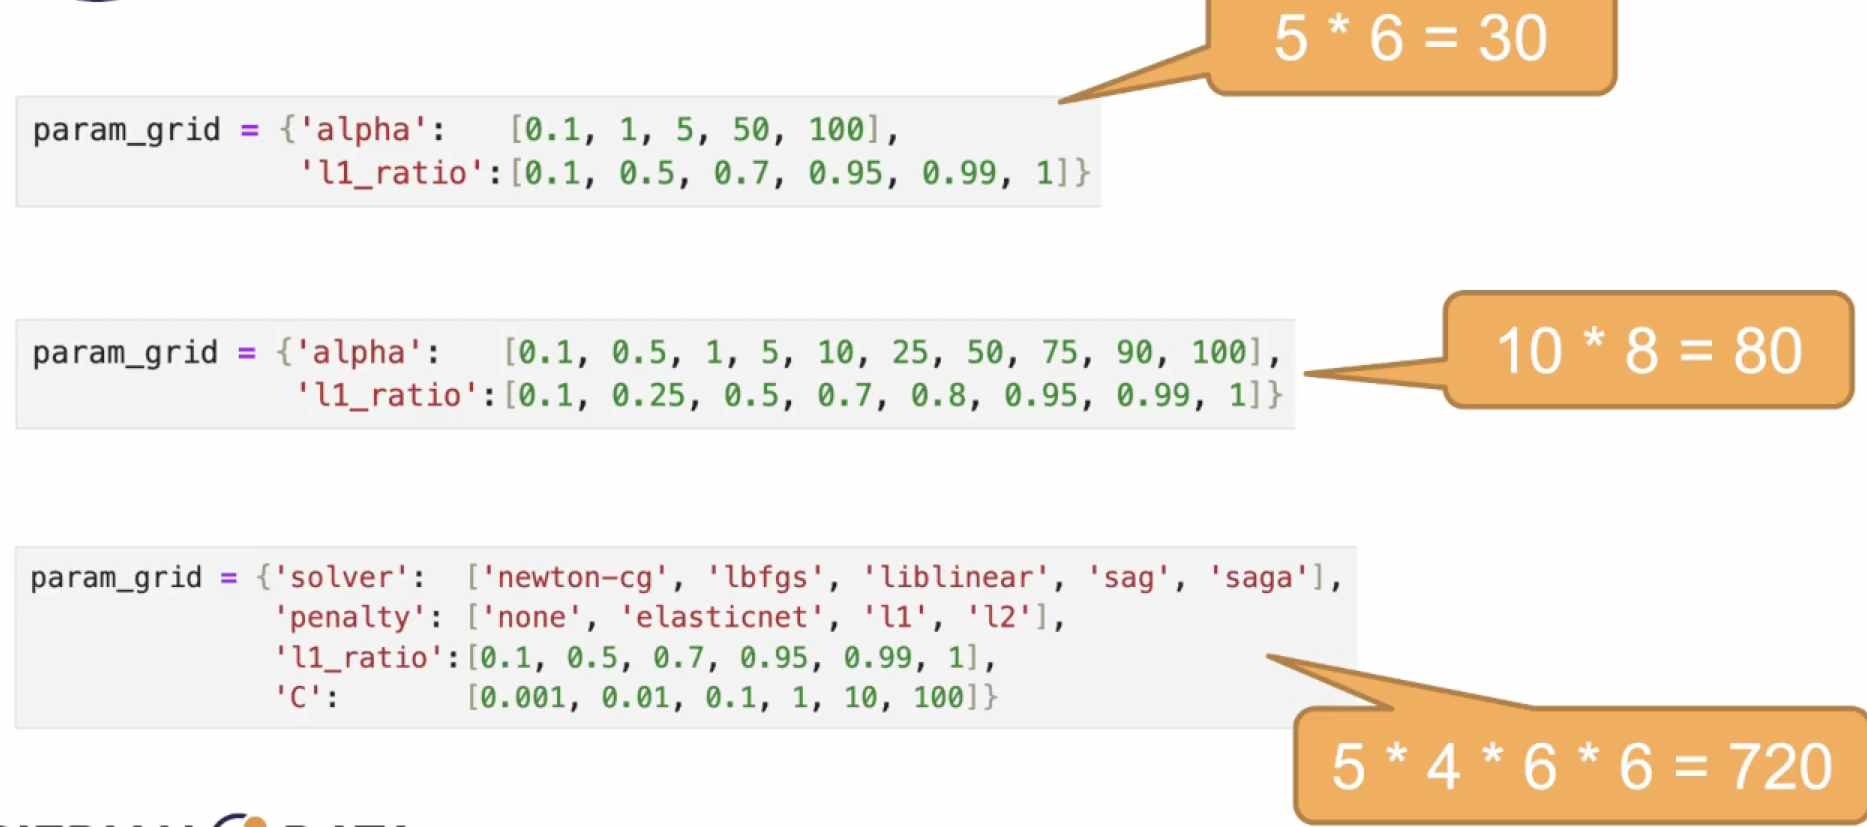

Сокращаем время

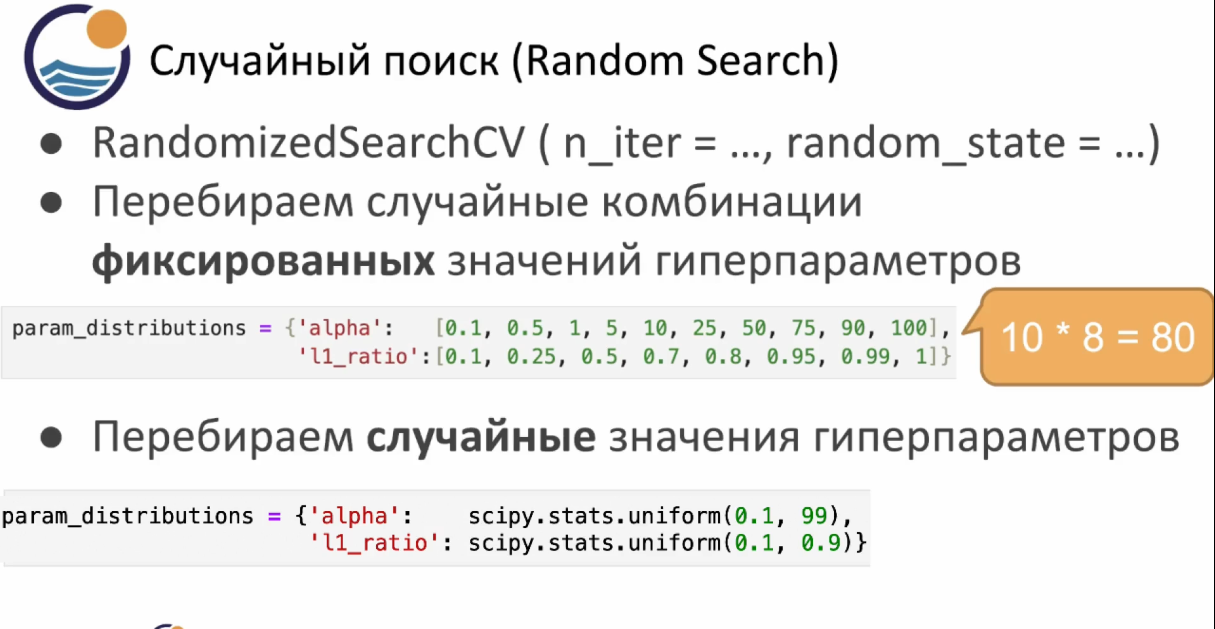